# Online Shoppers Purchasing Intention
[Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

__Problem Statement__

Predict the purchasing intention of the visitor using aggregated pageview data track during the visit along with some session and user information

__Data Dictionary__

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, \
confusion_matrix, f1_score, cohen_kappa_score, classification_report

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df.shape

(12330, 18)

In [4]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [7]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157213   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [8]:
df.describe(include='O').T

count unique                top   freq
Month        12330     10                May   3364
VisitorType  12330      3  Returning_Visitor  10551

In [9]:
# Check for Null Values
df.isnull().sum().sum()

0

In [10]:
# Check for duplicates
df.duplicated().sum()

125

In [11]:
# Check Conversion Rate (Revenue) for duplicate entries
df[df.duplicated()]['Revenue'].value_counts()

False    125
Name: Revenue, dtype: int64

In [12]:
# Given Conversion Rate For the Year
df['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

In [13]:
import pandas_profiling as pp
report = pp.ProfileReport(df)
report

In [14]:
# Export PandasProfilingReport 
report.to_file("PandasProfilingReport.html")

In [15]:
df.drop_duplicates(inplace=True)
df.to_csv('cleaned_dataset.csv', index=False)

In [16]:
df.shape

(12205, 18)

In [17]:
# Map Boolean values to 0 and 1
df['Weekend'] = df['Weekend'].map({False:0, True:1})
df['Revenue'] = df['Revenue'].map({False:0, True:1})

### Exploratory Data Analysis

In [18]:
# Unique counts of Features
cols = ['Administrative', 'Informational', 'ProductRelated', 'SpecialDay', 'Month', 'OperatingSystems', 
        'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
unique_counts = dict()
for col in cols:
    unique_counts[col] = df[col].nunique()
    
unique_counts_df = pd.Series(unique_counts).sort_values(ascending=False)
unique_counts_df

ProductRelated      311
Administrative       27
TrafficType          20
Informational        17
Browser              13
Month                10
Region                9
OperatingSystems      8
SpecialDay            6
VisitorType           3
Revenue               2
Weekend               2
dtype: int64

In [19]:
df[df['ProductRelated_Duration'] == df['ProductRelated_Duration'].max()]
# df[df['Administrative_Duration'] == df['Administrative_Duration'].max()]
# df[df['Informational_Duration'] == df['Informational_Duration'].max()]

Administrative  Administrative_Duration  Informational  \
8071               5                  3398.75              6   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
8071                2549.375             449              63973.52223   

      BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
8071     0.000764   0.027701         0.0         0.0   Dec                 2   

      Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
8071        2       1            2  Returning_Visitor        0        0

In [20]:
df.sort_values(by='ProductRelated_Duration', ascending=False).head(5)

Administrative  Administrative_Duration  Informational  \
8071               5              3398.750000              6   
5152              17              2629.253968             24   
9238              15              2657.318056             13   
8784              20              1307.675000              3   
8308              27               853.735949              2   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
8071             2549.375000             449              63973.52223   
5152             2050.433333             705              43171.23338   
9238             1949.166667             343              29970.46597   
8784              132.666667             517              27009.85943   
8308              126.500000             584              24844.15620   

      BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
8071     0.000764   0.027701    0.000000         0.0   Dec                 2   
5152     0.004851   0.015431    0.763829         0.0   May                 2   
9238     0.005316   0.028971    0.000000         0.0   Dec                 2   
8784     0.004385   0.014594    8.403164         0.0   Nov                 1   
8308     0.002099   0.009347    4.511100         0.0   Nov                 2   

      Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
8071        2       1            2  Returning_Visitor        0        0  
5152        2       1           14  Returning_Visitor        1        0  
9238        2       1            2  Returning_Visitor        0        0  
8784        1       1            2  Returning_Visitor        0        1  
8308        4       3            8  Returning_Visitor        0        0

    17.48 Hours were spent on the product related page number 449. 
    56.65 Minutes were spent on administrative page number 5. 
    42.49 Minutes were spent on informational page number 6.

In [21]:
df[df['ProductRelated'] == 449]['Revenue'].value_counts()

0    1
Name: Revenue, dtype: int64

In [22]:
df[df['Administrative'] == 5]['Revenue'].value_counts(normalize=True)

0    0.794783
1    0.205217
Name: Revenue, dtype: float64

In [23]:
df[df['Informational'] == 6]['Revenue'].value_counts(normalize=True)

0    0.782051
1    0.217949
Name: Revenue, dtype: float64

    No revenue was generated on product related page 449.

In [24]:
df[df['ProductRelated_Duration'] > 0].sort_values(by='ProductRelated_Duration').head(3)

Administrative  Administrative_Duration  Informational  \
11565               0                      0.0              0   
1450                0                      0.0              0   
5256                0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
11565                     0.0               1                      0.5   
1450                      0.0               1                      1.0   
5256                      0.0               3                      1.0   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
11565     0.000000   0.066667         0.0         0.0   Dec                 2   
1450      0.000000   0.100000         0.0         0.0   Mar                 2   
5256      0.133333   0.133333         0.0         0.0   May                 2   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
11565        2       4           13  Returning_Visitor        0        0  
1450         2       2            1  Returning_Visitor        0        0  
5256         2       1            6  Returning_Visitor        0        0

In [25]:
df[df['Administrative_Duration'] > 0].sort_values(by='Administrative_Duration').head(3)

Administrative  Administrative_Duration  Informational  \
1294                1                 1.333333              0   
11224               1                 2.000000              0   
3528                1                 2.000000              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
1294                      0.0              32               395.222222   
11224                     0.0               6               106.750000   
3528                      0.0              24               958.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
1294      0.006061   0.011111    0.000000         0.0   Mar                 2   
11224     0.033333   0.044444    0.000000         0.0   Nov                 3   
3528      0.025000   0.035000   24.340167         0.0   May                 2   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
1294         4       1            2  Returning_Visitor        1        0  
11224        2       3            3  Returning_Visitor        0        0  
3528         2       1            6  Returning_Visitor        0        0

In [26]:
df[df['Informational_Duration'] > 0].sort_values(by='Informational_Duration').head(3)

Administrative  Administrative_Duration  Informational  \
1684               6                     99.0              1   
3253               0                      0.0              1   
4451               2                    273.0              1   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
1684                     1.0              23               637.000000   
3253                     1.0              93              4324.737073   
4451                     1.0              10               384.400000   

      BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
1684     0.000000   0.002469         0.0         0.0   Mar                 2   
3253     0.021113   0.034077         0.0         1.0   May                 3   
4451     0.044444   0.043386         0.0         0.0   May                 1   

      Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
1684        5       9            8        New_Visitor        0        0  
3253        2       1            5  Returning_Visitor        1        0  
4451        1       1            3  Returning_Visitor        0        0

Time spent on different page categories apart from 0:

    Minimum time spent on product related pages: 0.5 seconds
    Minimum time spent on administrative pages: 1.33 seconds
    Minimum time spent on Informational pages: 1 second

In [27]:
df[(df['Administrative_Duration'] == 0) & (df['Informational_Duration'] == 0) & (df['ProductRelated_Duration'] == 0)]['Revenue'].value_counts()

0    592
1      3
Name: Revenue, dtype: int64

In [28]:
df[(df['Administrative_Duration'] == 0) & (df['Informational_Duration'] == 0) & (df['ProductRelated_Duration'] == 0) & (df['Revenue'] == 1)]

Administrative  Administrative_Duration  Informational  \
6700                0                      0.0              0   
7600                0                      0.0              0   
10789               1                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
6700                      0.0               1                      0.0   
7600                      0.0               3                      0.0   
10789                     0.0               1                      0.0   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
6700           0.2        0.2         0.0         0.0   Oct                 2   
7600           0.2        0.2         0.0         0.0   Nov                 3   
10789          0.2        0.2         0.0         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
6700         5       1           20  Returning_Visitor        0        1  
7600         2       1           11  Returning_Visitor        0        1  
10789        2       3            8  Returning_Visitor        0        1

    There are 3 returning customers who have made a transaction but their administrative duration, informational duration and product related duration is 0. This might be because product was already added in the cart and the customer did the checkout.
    Also in the above case, the bounce rates and exit reates were the max i.e. 0.2.

In [29]:
df[(df['Administrative_Duration'] == 0)]['Revenue'].value_counts(normalize=True)

0    0.905157
1    0.094843
Name: Revenue, dtype: float64

In [30]:
df[(df['Informational_Duration'] == 0)]['Revenue'].value_counts(normalize=True)

0    0.862959
1    0.137041
Name: Revenue, dtype: float64

In [31]:
df[(df['ProductRelated_Duration'] == 0)]['Revenue'].value_counts(normalize=True)

0    0.979365
1    0.020635
Name: Revenue, dtype: float64

In [32]:
df[(df['ProductRelated_Duration'] == 0) & (df['Revenue'] == 1)]

Administrative  Administrative_Duration  Informational  \
5580                1                    44.00              0   
5622                1                    12.00              0   
6079                2                    17.20              0   
6290                1                    29.20              0   
6539                1                    23.20              0   
6700                0                     0.00              0   
7311                1                    28.20              0   
7436                1                    36.30              0   
7600                0                     0.00              0   
7691                1                    24.20              0   
9166                1                    25.50              0   
10433               1                    22.75              0   
10789               1                     0.00              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
5580                      0.0               1                      0.0   
5622                      0.0               0                      0.0   
6079                      0.0               0                      0.0   
6290                      0.0               0                      0.0   
6539                      0.0               0                      0.0   
6700                      0.0               1                      0.0   
7311                      0.0               1                      0.0   
7436                      0.0               1                      0.0   
7600                      0.0               3                      0.0   
7691                      0.0               0                      0.0   
9166                      0.0               0                      0.0   
10433                     0.0               1                      0.0   
10789                     0.0               1                      0.0   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
5580      0.000000   0.066667         0.0         0.0   Sep                 1   
5622      0.000000   0.022222         0.0         0.0   Aug                 3   
6079      0.000000   0.050000         0.0         0.0   Sep                 2   
6290      0.000000   0.066667         0.0         0.0   Nov                 1   
6539      0.000000   0.033333         0.0         0.0   Oct                 2   
6700      0.200000   0.200000         0.0         0.0   Oct                 2   
7311      0.000000   0.050000         0.0         0.0   Sep                 1   
7436      0.053333   0.093333         0.0         0.0   Sep                 3   
7600      0.200000   0.200000         0.0         0.0   Nov                 3   
7691      0.000000   0.066667         0.0         0.0   Nov                 1   
9166      0.000000   0.066667         0.0         0.0   Nov                 1   
10433     0.000000   0.066667         0.0         0.0   Dec                 1   
10789     0.200000   0.200000         0.0         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
5580         1       1            5        New_Visitor        0        1  
5622         2       6            2  Returning_Visitor        1        1  
6079         2       2            6        New_Visitor        1        1  
6290         1       4            2  Returning_Visitor        1        1  
6539         2       6            3  Returning_Visitor        0        1  
6700         5       1           20  Returning_Visitor        0        1  
7311         1       1            5        New_Visitor        0        1  
7436         2       3            6  Returning_Visitor        0        1  
7600         2       1           11  Returning_Visitor        0        1  
7691         1       1            3  Returning_Visitor        1        1  
9166         1       8            8        New_Visitor        0        1  
10433        1       1  

    There are 13 customers who made the transaction but their product related duration and informational duration is 0. 

In [33]:
df[(df['PageValues'] == df['PageValues'].max())]

Administrative  Administrative_Duration  Informational  \
9239               3                     37.5              0   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
9239                     0.0              18                    607.5   

      BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
9239          0.0   0.010526  361.763742         0.0   Nov                 2   

      Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
9239        2       3            2  New_Visitor        0        1

In [34]:
df.groupby('ProductRelated')['PageValues'].mean().reset_index()\
.sort_values(by='PageValues', ascending=False).head(10)

ProductRelated  PageValues
201             205  177.528825
184             184   72.529615
270             318   45.155135
217             226   44.696428
139             139   35.999813
231             245   32.097750
114             114   29.347066
250             276   27.432095
155             155   26.061990
162             162   23.444661

In [35]:
df[df['ProductRelated'].isin([205,184,318])]['Revenue'].value_counts()

0    3
1    1
Name: Revenue, dtype: int64

In [36]:
df[df['ProductRelated'].isin([13,15,12])]['Revenue'].value_counts()

0    747
1    125
Name: Revenue, dtype: int64

In [37]:
df.groupby('Weekend')['Revenue'].value_counts(normalize=True)*100

Weekend  Revenue
0        0          84.924032
         1          15.075968
1        0          82.546345
         1          17.453655
Name: Revenue, dtype: float64

In [38]:
df['SpecialDay'].value_counts(normalize=True)

0.0    0.897665
0.6    0.028677
0.8    0.026546
0.4    0.019910
0.2    0.014584
1.0    0.012618
Name: SpecialDay, dtype: float64

### Univariate & Bivariate Analysis

0    10297
1     1908
Name: Revenue, dtype: int64
0    0.843671
1    0.156329
Name: Revenue, dtype: float64


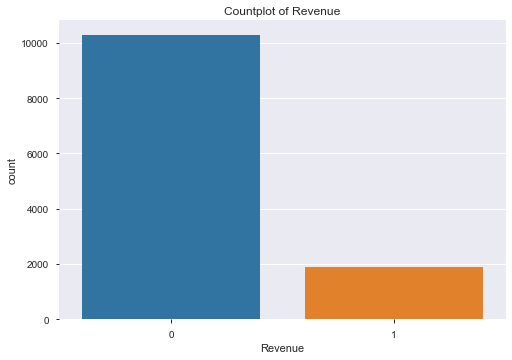

In [39]:
# Target Analysis 
print(df['Revenue'].value_counts())
print(df['Revenue'].value_counts(normalize=True))
sns.countplot(df['Revenue'])
plt.title("Countplot of Revenue")
plt.show()

The baseline revenue generation through Online Shoppers for the given year is **15.63%**.  

In [40]:
# Function to create combined univariate and bivariate plots of categorical variables
def combined_plots(col):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.countplot(df[col])
    plt.title(f"Countplot of {col}")

    plt.subplot(1,2,2)
    sns.countplot(df[col], hue=df['Revenue'])
    plt.title(f"Countplot of {col} VS Revenue")
    plt.show()

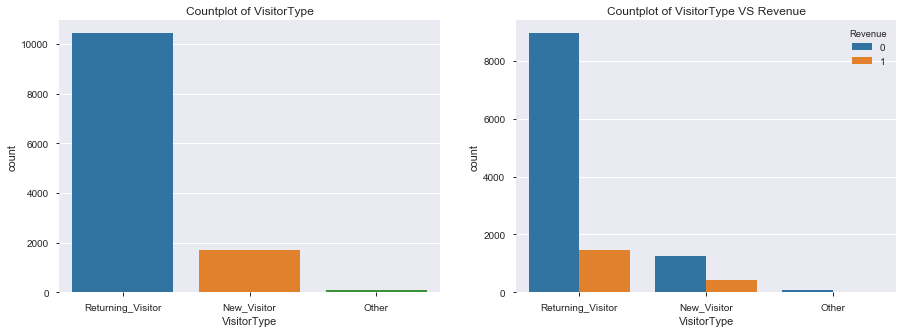

In [41]:
combined_plots('VisitorType')

In [42]:
df.groupby('VisitorType')['Revenue'].value_counts(normalize=True)

VisitorType        Revenue
New_Visitor        0          0.750738
                   1          0.249262
Other              0          0.802469
                   1          0.197531
Returning_Visitor  0          0.859074
                   1          0.140926
Name: Revenue, dtype: float64

    Though the returning visitors corresponds to ~85% of the overall sessions, but the conversion rate of new visitors is (24.93 – 14.09) ~ 10% greater than the returning visitors.

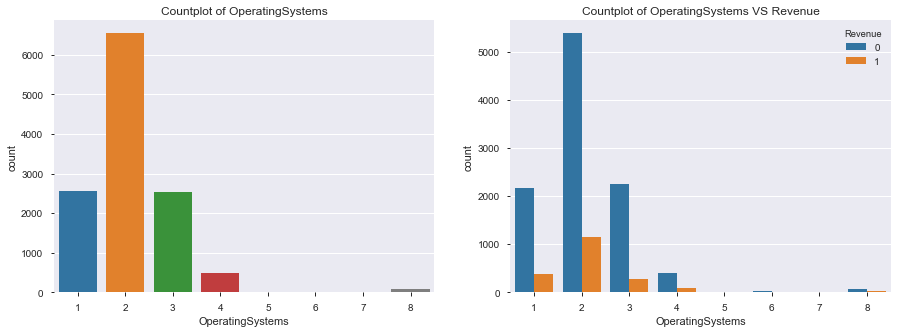

In [43]:
combined_plots('OperatingSystems')

    95.2% of the customers/visitors are having OS types 2, 1, and 3 respectively. Conversion rate is high on OS type 2 in comparison with type 1 and 3.

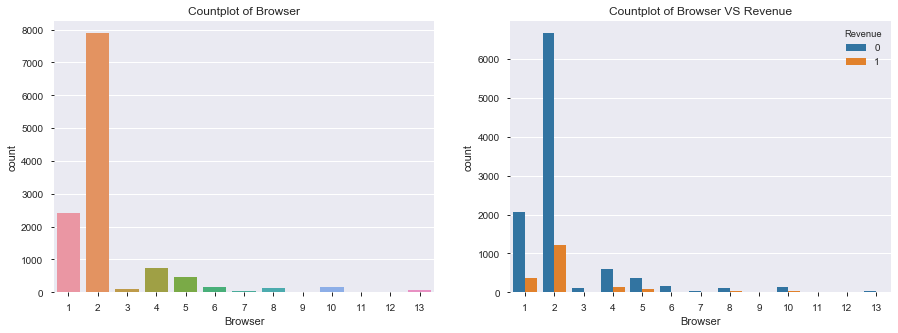

In [44]:
combined_plots('Browser')

    84.48% of the customers/visitors are using Browser type 2 and 1 respectively. Apart from browser type 4 and 5, all other browsers have very less usage rate. 
    Browser type 2 has a contribution of 10% in revenue generation overall.

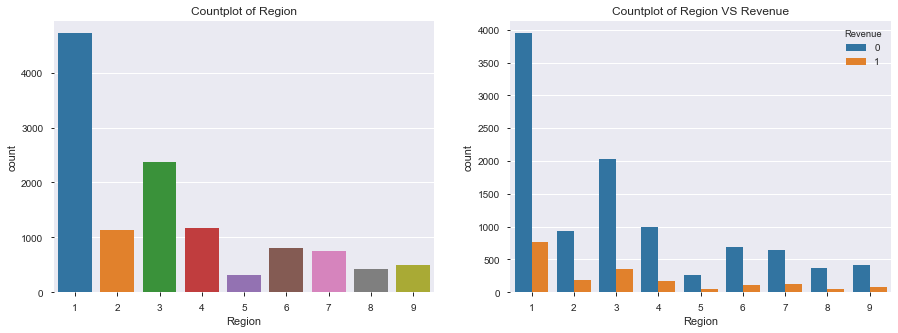

In [45]:
combined_plots('Region')

    76.94% of the customers are from region 1, 3, 4, and 2 respectively and only customers from region 1 and 3 are contributing maximum in revenue generation. More efforts needs to be made in the region 2 and 4 to increase the revenue generation.

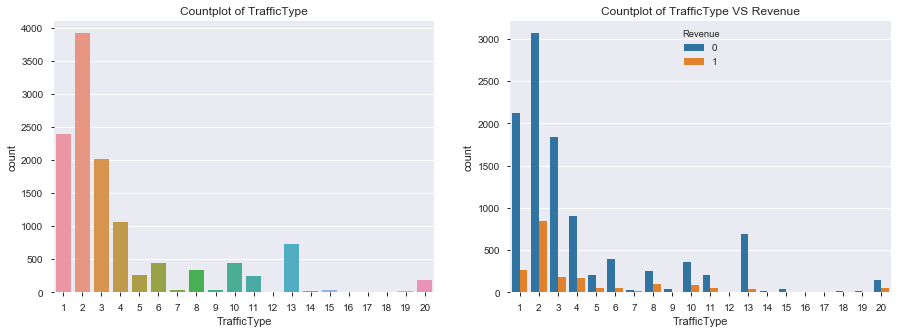

In [46]:
combined_plots('TrafficType')

    82.79% of the traffic generation is via Traffic Types 2, 1, 3, 4, and 13 respectively. 
    Overall, Traffic Type 2 has contributed more in the revenue generation w.r.t other traffic types. 

    Also, Traffic Types 12, 15, 17 and 18 has zero contribution in revenue generation. The company must look up what these traffic types corresponds to in real terms so that either they can improve the digital marketing if it corresponds to ads, social media etc. or ignore it if it is coming from something non-relevant.

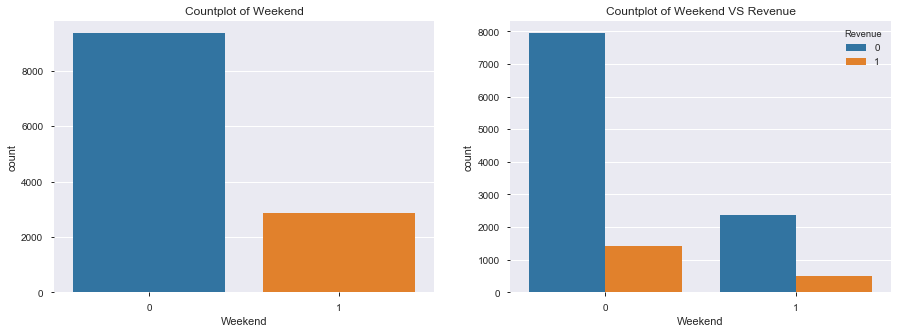

In [47]:
combined_plots('Weekend')

In [48]:
df.groupby('Weekend')['Revenue'].value_counts(normalize=True)

Weekend  Revenue
0        0          0.849240
         1          0.150760
1        0          0.825463
         1          0.174537
Name: Revenue, dtype: float64

    It seems like customers/visitors like to shop on non-weekends more in comparison to weekends. 
    But revenue conversion is slightly higher on weekends.

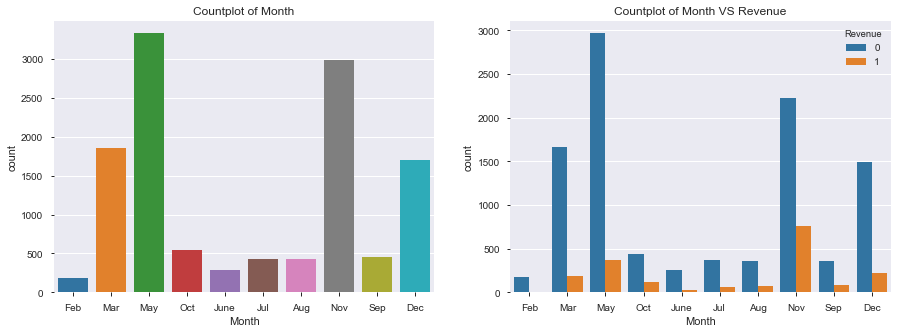

In [49]:
combined_plots('Month')

    80.93% of customers were active in the months of May, November, March, and December combined. 
    November has contributed the maximum in terms of revenue generation while February has the least contribution in the revenue generation.
    Although, May has the highest number of visitors but the revenue generation is approximately 52% more in November in comparison to May.

In [50]:
round((df[df['Revenue'] == 1].groupby('Month')['Revenue'].value_counts()/df.shape[0])*100,2).sort_values(ascending=False)[:2]

Month  Revenue
Nov    1          6.23
May    1          2.99
Name: Revenue, dtype: float64

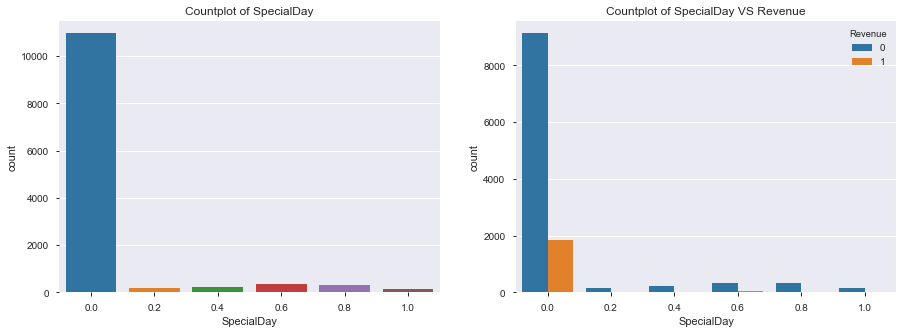

In [51]:
combined_plots('SpecialDay')

    Approximately 90% of the interactions or session generation happened on Non-Special Days. Since it’s a Sportswear Company, there is no affinity for Special Days to Revenue generation.

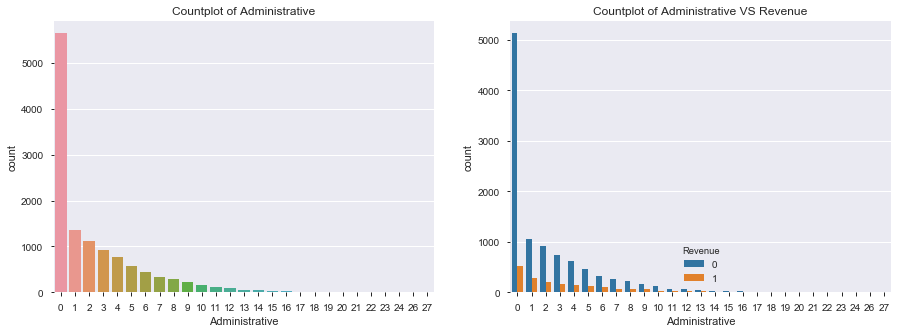

In [52]:
combined_plots('Administrative')

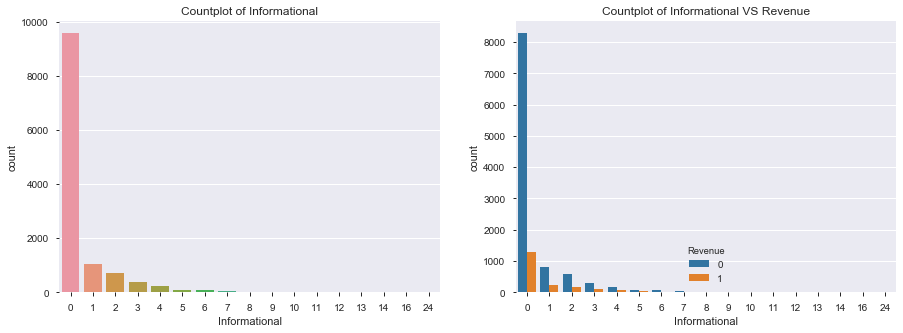

In [53]:
combined_plots('Informational')

__Univariate Observations:__

- Mostly used OSes are: 2, 3 & 1.
- Mostly used browser are: 2 & 1.
- Traffic type is mostly via: 1, 2, 3, 4& 13.
- People mostly visit on weekdays.
- Majority of customers are from region 1 & 3.
- Average time spent on ProductRelated pages is more than Administrative and Informational Pages.


__Bivariate Observations:__

- Revenue is more on Weekdays.
- November has contributed the most in revenue followed by May & December while February followed by June has contributed the least.
- More revenue is generated from the Returning visitors.
- OS Type '2' has generated the most revenue followed by Type '1'.
- Browser Type '2' has generated the most revenue followed by Type '1'.
- Traffic Type '2' has generated the most revenue followed by Type '1' and '3'.
- Majority of revenue are from Region 1, 3 & 4.

In [54]:
num_cols = ['Administrative','Administrative_Duration', 'Informational', 'Informational_Duration',
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

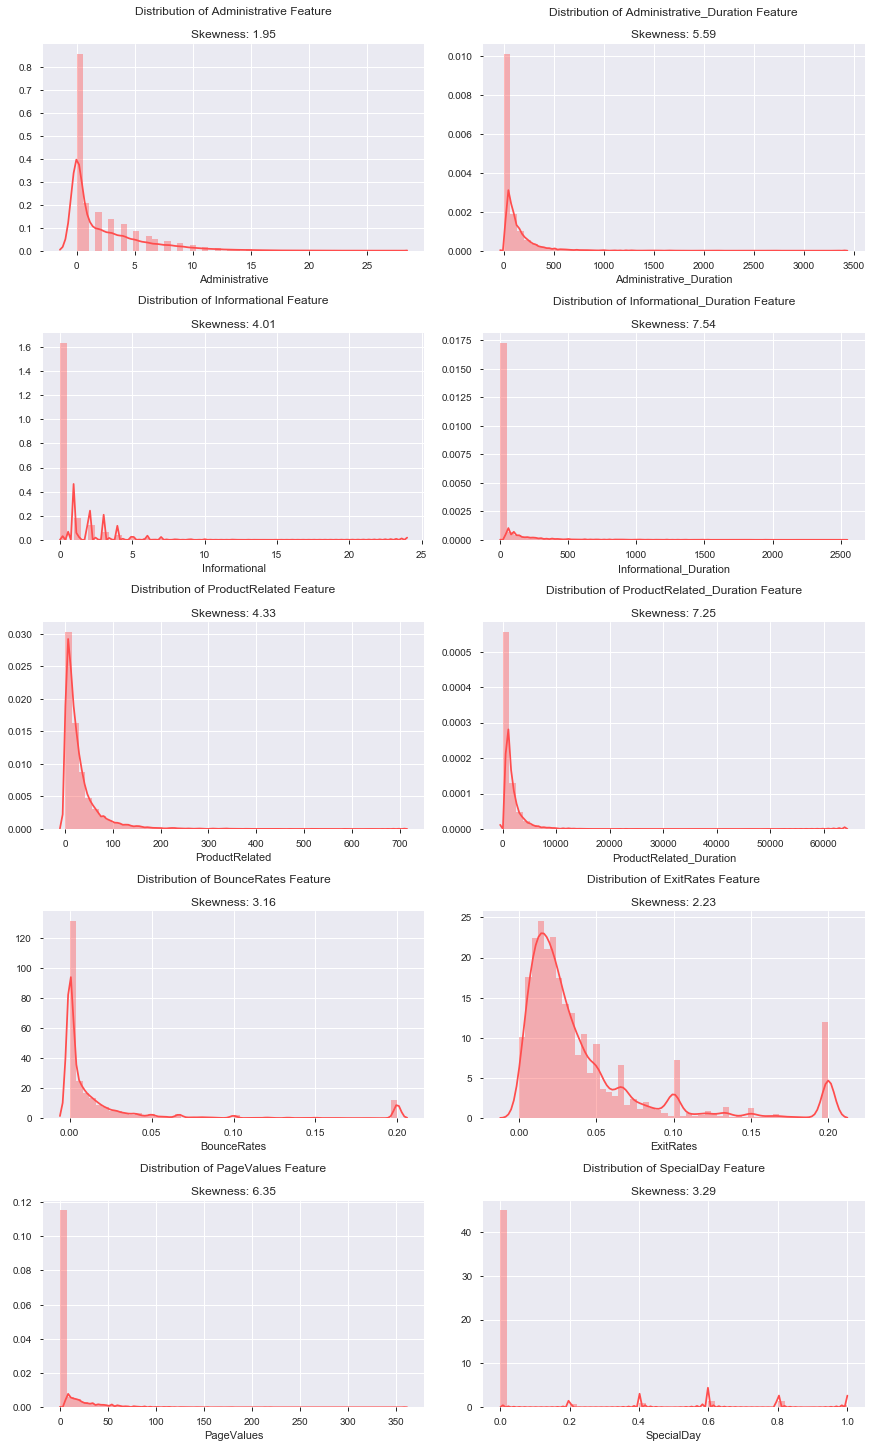

In [55]:
figs, axes = plt.subplots(5,2, figsize=(12,20), constrained_layout=True)
for col, ax in zip(num_cols, axes.flat):
    sns.distplot(df[col], ax=ax, color='#ff4d4d')
    ax.set_title("Distribution of {} Feature\n\nSkewness: {}".format(col, round(df[col].skew(),2)))
plt.show()

In [56]:
print("Average Time Spent on Administrative Page:", round(np.mean(df['Administrative_Duration']),2))
print("Average Time Spent on Informational Page:", round(np.mean(df['Informational_Duration']),2))
print("Average Time Spent on ProductRelated Page:", round(np.mean(df['ProductRelated_Duration']),2))

Average Time Spent on Administrative Page: 81.65
Average Time Spent on Informational Page: 34.83
Average Time Spent on ProductRelated Page: 1206.98


#### Which TrafficTypes have generated no Revenue? 

In [57]:
df.groupby('TrafficType')['Revenue'].sum().sort_values()[:4]

TrafficType
18    0
17    0
15    0
12    0
Name: Revenue, dtype: int64

#### Which TrafficType(s) has generated maximum Revenue? 

In [58]:
df.groupby('TrafficType')['Revenue'].sum().sort_values(ascending=False)[:1]

TrafficType
2    847
Name: Revenue, dtype: int64

#### Which TrafficTypes have generated high bounce rate and what is the overall Revenue generation from those TrafficTypes?

In [59]:
df[df['BounceRates'] > 0.1].groupby('TrafficType')['Revenue'].sum().sort_values(ascending=False)[:3]

TrafficType
11    2
20    1
8     1
Name: Revenue, dtype: int64

In [60]:
df[df['TrafficType'].isin([11,20,8])]['Revenue'].value_counts()

0    591
1    192
Name: Revenue, dtype: int64

    Bounce rate can be wildly different depending on the source of traffic. For example, it’s likely that search traffic will produce a low bounce rate while social and display traffic might produce a high bounce rate.

#### Which TrafficTypes generate high exit rate and what is the overall Revenue generation from those TrafficTypes?

In [61]:
df[df['ExitRates'] > 0.15].groupby('TrafficType')['Revenue'].sum().sort_values(ascending=False)[:3]

TrafficType
20    1
11    1
8     1
Name: Revenue, dtype: int64

In [62]:
df[df['TrafficType'].isin([11,20,8])]['Revenue'].value_counts(normalize=True)

0    0.754789
1    0.245211
Name: Revenue, dtype: float64

#### Which Region generates high bounce rate?

In [63]:
df[df['BounceRates'] >= 0.2].groupby('Region')['BounceRates'].count().sort_values(ascending=False)[:1]

Region
1    201
Name: BounceRates, dtype: int64

In [64]:
df[(df['BounceRates'] >=0.2) & (df['ExitRates'] >= 0.15)]['Administrative'].value_counts()

0    561
1     13
2      1
Name: Administrative, dtype: int64

In [65]:
df[(df['BounceRates'] >=0.2) & (df['ExitRates'] >= 0.15)]['Informational'].value_counts()

0    569
1      6
Name: Informational, dtype: int64

#### What are the TrafficTypes of NewVisitors?

In [66]:
df[df['VisitorType'] == 'New_Visitor'].groupby('TrafficType')['VisitorType'].value_counts().sort_values(ascending=False)[:5]

TrafficType  VisitorType
2            New_Visitor    935
8            New_Visitor    175
5            New_Visitor    149
3            New_Visitor    140
4            New_Visitor     99
Name: VisitorType, dtype: int64

#### What is the fraction of Special Day every month?

In [67]:
df.groupby(['Month','SpecialDay'])['Revenue'].value_counts(normalize=True)

Month  SpecialDay  Revenue
Aug    0.0         0          0.824480
                   1          0.175520
Dec    0.0         0          0.873388
                   1          0.126612
Feb    0.0         0          0.990196
                   1          0.009804
       0.2         0          1.000000
       0.4         0          1.000000
       0.6         0          1.000000
       0.8         0          0.947368
                   1          0.052632
       1.0         0          0.800000
                   1          0.200000
Jul    0.0         0          0.847222
                   1          0.152778
June   0.0         0          0.898246
                   1          0.101754
Mar    0.0         0          0.896774
                   1          0.103226
May    0.0         0          0.865679
                   1          0.134321
       0.2         0          0.914110
                   1          0.085890
       0.4         0          0.941441
                   1          0.05855

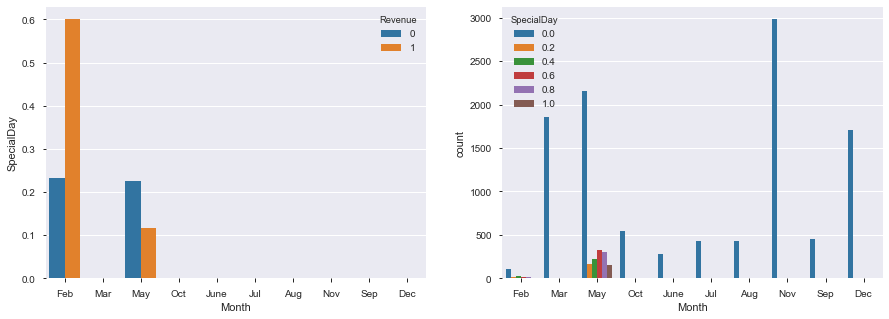

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df.Month, df.SpecialDay, hue = df.Revenue, ci = None)
plt.subplot(1,2,2)
sns.countplot(df['Month'], hue=df['SpecialDay'])
plt.show()

Special day only accounts for in the month of February and May.

#### What are average values of numerical features for users likely to make a transaction?

In [69]:
df[df['Revenue'] == 1].mean()

Administrative                3.393606
Administrative_Duration     119.483244
Informational                 0.786164
Informational_Duration       57.611427
ProductRelated               48.210168
ProductRelated_Duration    1876.209615
BounceRates                   0.005117
ExitRates                     0.019555
PageValues                   27.264518
SpecialDay                    0.023166
OperatingSystems              2.092767
Browser                       2.453354
Region                        3.082285
TrafficType                   4.021488
Weekend                       0.261530
Revenue                       1.000000
dtype: float64

Average time spent by user on Product Pages is 1876.209615. 

Average time spent by user on Administrative Pages is 119.483244. 

Average time spent by user on Informational Pages is 57.11427. 

In [70]:
df[df['Revenue'] == 0].mean()

Administrative                2.143440
Administrative_Duration      74.635276
Informational                 0.457318
Informational_Duration       30.603289
ProductRelated               29.050403
ProductRelated_Duration    1082.976881
BounceRates                   0.023197
ExitRates                     0.045526
PageValues                    1.999985
SpecialDay                    0.069127
OperatingSystems              2.130038
Browser                       2.340099
Region                        3.166456
TrafficType                   4.083617
Weekend                       0.229193
Revenue                       0.000000
dtype: float64

    Visitors who had spent more average duration on any of the page types are likely to make a transaction.

### Multivariate Analysis

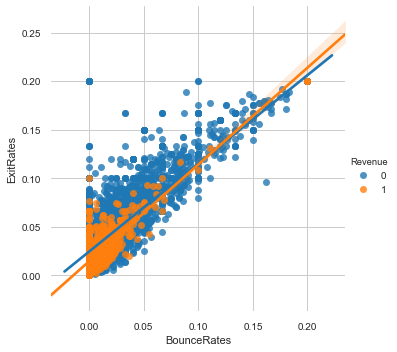

In [71]:
sns.set_style('whitegrid')
sns.lmplot('BounceRates','ExitRates',hue='Revenue', data=df)
plt.show()

    Exit Rates and Bounce Rates are positively correlated with the correlation coefficient of 0.90.

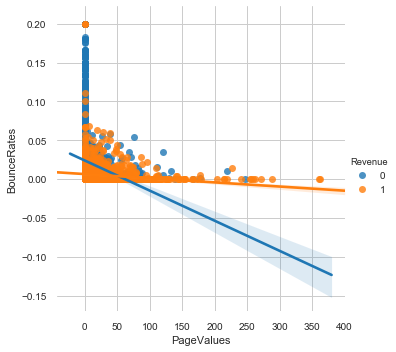

In [72]:
sns.lmplot('PageValues','BounceRates',hue='Revenue', data=df)
plt.show()

    Bounce Rates and Page Values are negatively correlated. As the page value increases, exit rates decreases and vice-versa.

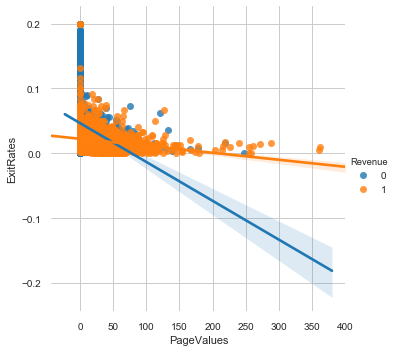

In [73]:
sns.lmplot('PageValues','ExitRates', hue='Revenue', data=df)
plt.show()

    Exit Rates and Page Values are negatively correlated. As the page value increases, exit rates decreases and vice-versa.

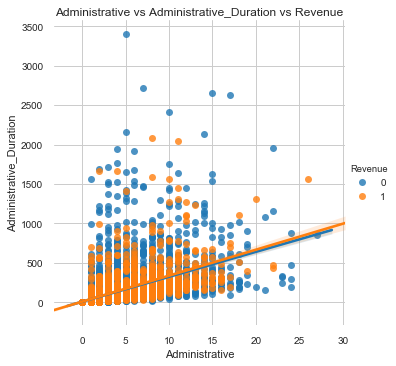

In [74]:
sns.lmplot('Administrative', 'Administrative_Duration', hue='Revenue', data=df)
plt.title("Administrative vs Administrative_Duration vs Revenue")
plt.show()

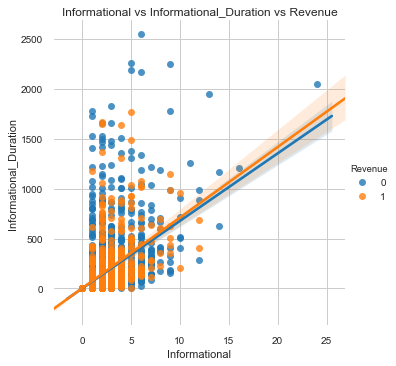

In [75]:
sns.lmplot('Informational', 'Informational_Duration', hue='Revenue', data=df)
plt.title("Informational vs Informational_Duration vs Revenue")
plt.show()

    Administrative Pages and Administrative Duration, Informational and Informational Duration, Product Related and Product Related Duration are positively correlated.

    On administrative pages 2 to 15 such as login, logout, password recovery, profile, email wish list etc., visitors have spent more than 500 seconds (approx. 8 minutes) which is generally quite higher than normal. It suggests that visitors are having trouble logging in or it’s taking too much time to process the request.

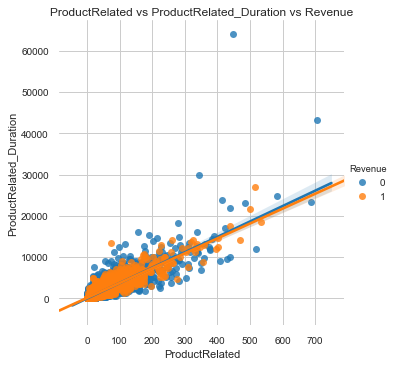

In [76]:
sns.lmplot('ProductRelated', 'ProductRelated_Duration', hue='Revenue', data=df)
plt.title("ProductRelated vs ProductRelated_Duration vs Revenue")
plt.show()

    Even though customers/visitors have spent a large amount of time on product related pages but the revenue generation is very low. There are certain outliers who did spent more than 30000 seconds (approx. 8 Hours) but still didn’t make any transaction.

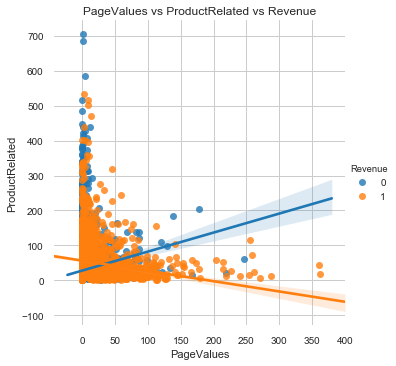

In [77]:
sns.lmplot('PageValues', 'ProductRelated',hue='Revenue', data=df)
plt.title("PageValues vs ProductRelated vs Revenue")
plt.show()

    With increasing Page Values, the revenue generation is more. There are certain pages which have very less page values which need to be improved in order to generate revenue.

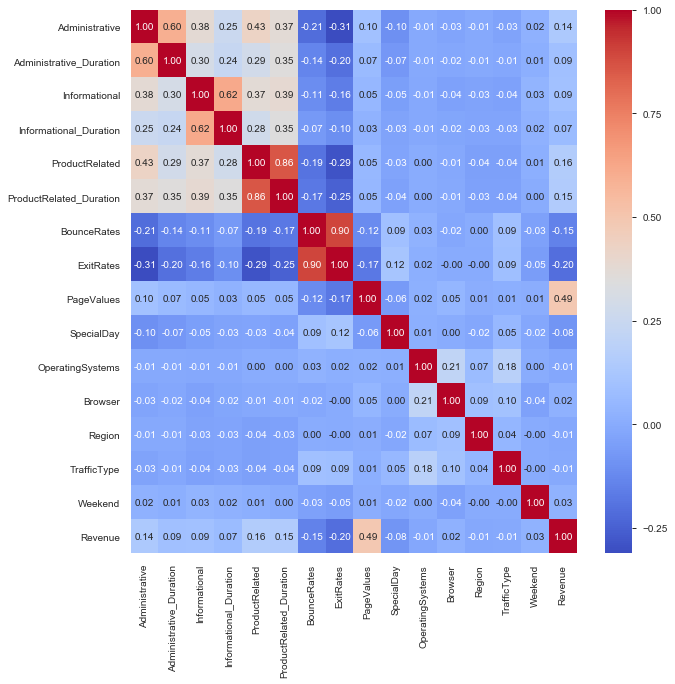

In [78]:
plt.figure(figsize=[10,10])
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.ylim(16, 0)
plt.show()

In [79]:
# Find all correlations and sort 
correlations_data = df.corr()['Revenue'].sort_values()

# Print the most negative correlations
print(correlations_data.head(10), '\n')

# Print the most positive correlations
print(correlations_data.tail(10))

ExitRates                 -0.204320
BounceRates               -0.145091
SpecialDay                -0.083601
OperatingSystems          -0.014927
Region                    -0.012725
TrafficType               -0.005618
Browser                    0.024052
Weekend                    0.027729
Informational_Duration     0.069358
Administrative_Duration    0.091768
Name: Revenue, dtype: float64 

Browser                    0.024052
Weekend                    0.027729
Informational_Duration     0.069358
Administrative_Duration    0.091768
Informational              0.093626
Administrative             0.136330
ProductRelated_Duration    0.150077
ProductRelated             0.156042
PageValues                 0.491894
Revenue                    1.000000
Name: Revenue, dtype: float64


In [80]:
df['SpecialDay'] = df['SpecialDay'].astype('category')

In [81]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0        0.0   Feb                 1   
1         0.00       0.10         0.0        0.0   Feb                 2   
2         0.20       0.20         0.0        0.0   Feb                 4   
3         0.05       0.14         0.0        0.0   Feb                 3   
4         0.02       0.05         0.0        0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor        0        0  
1        2       1            2  Returning_Visitor        0        0  
2        1       9            3  Returning_Visitor        0        0  
3        2       2            4  Returning_Visitor        0        0  
4        3       1            4  Returning_Visitor        1        0

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12205 non-null int64
Administrative_Duration    12205 non-null float64
Informational              12205 non-null int64
Informational_Duration     12205 non-null float64
ProductRelated             12205 non-null int64
ProductRelated_Duration    12205 non-null float64
BounceRates                12205 non-null float64
ExitRates                  12205 non-null float64
PageValues                 12205 non-null float64
SpecialDay                 12205 non-null category
Month                      12205 non-null object
OperatingSystems           12205 non-null int64
Browser                    12205 non-null int64
Region                     12205 non-null int64
TrafficType                12205 non-null int64
VisitorType                12205 non-null object
Weekend                    12205 non-null int64
Revenue                    12205 non-null int64
dtypes: ca

### Preprocessing & Base Model

In [83]:
df2 = pd.get_dummies(df, drop_first=True)

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 31 columns):
Administrative                   12205 non-null int64
Administrative_Duration          12205 non-null float64
Informational                    12205 non-null int64
Informational_Duration           12205 non-null float64
ProductRelated                   12205 non-null int64
ProductRelated_Duration          12205 non-null float64
BounceRates                      12205 non-null float64
ExitRates                        12205 non-null float64
PageValues                       12205 non-null float64
OperatingSystems                 12205 non-null int64
Browser                          12205 non-null int64
Region                           12205 non-null int64
TrafficType                      12205 non-null int64
Weekend                          12205 non-null int64
Revenue                          12205 non-null int64
SpecialDay_0.2                   12205 non-null uint8
SpecialDay_0.4 

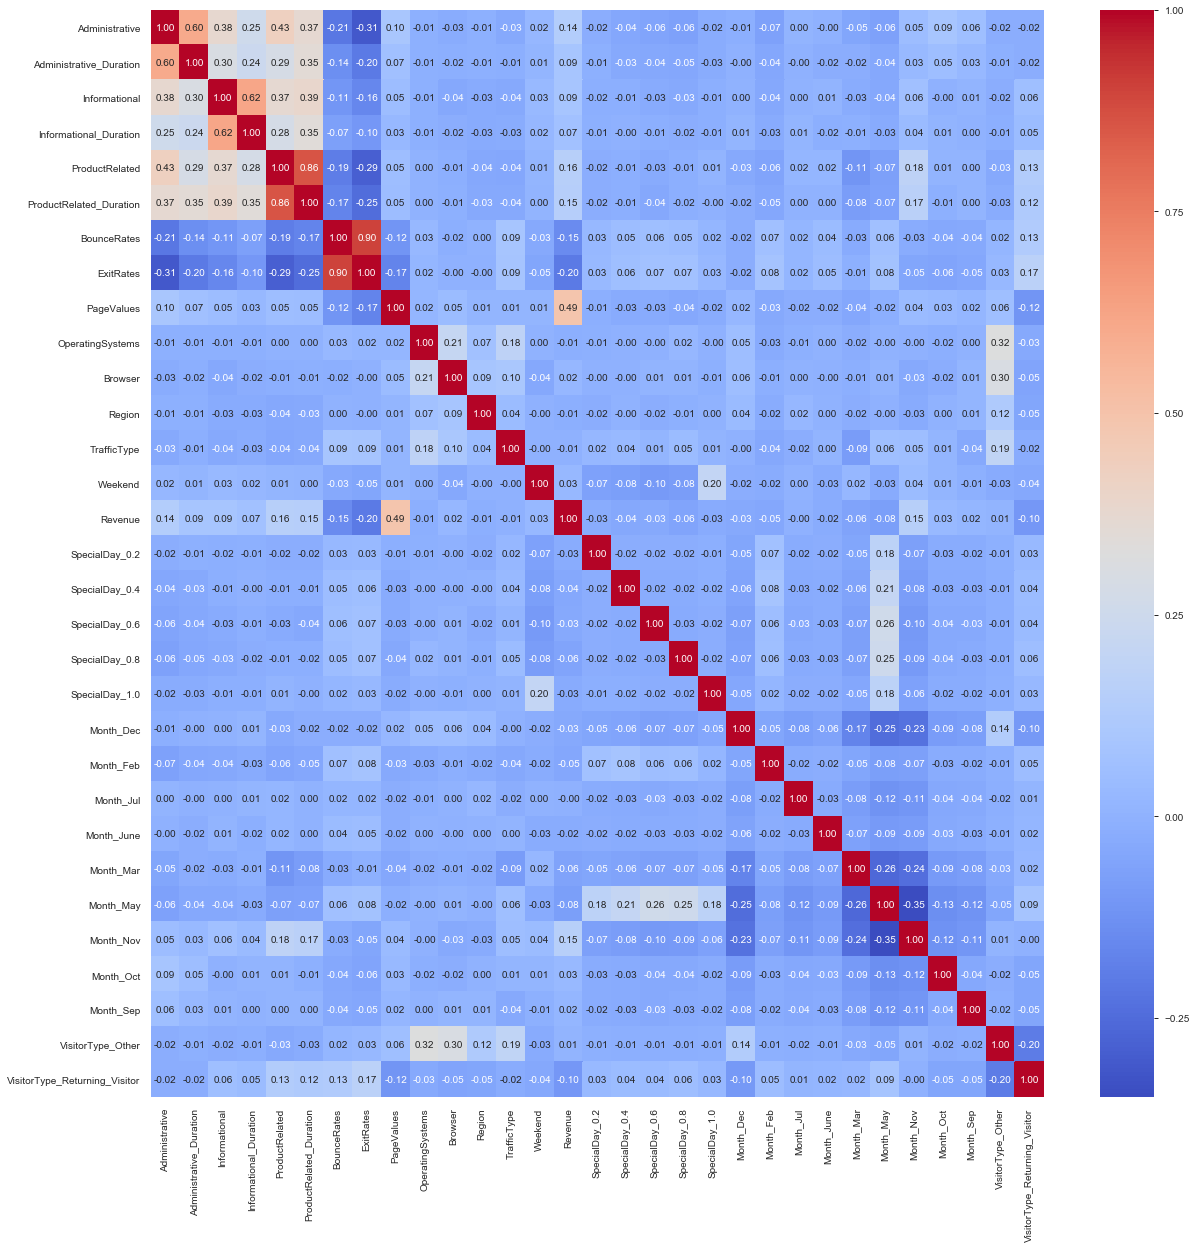

In [85]:
plt.figure(figsize=[20,20])
corr = df2.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.ylim(31, 0)
plt.show()

In [86]:
X = df2.drop('Revenue', axis=1)
y = df2['Revenue']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
x_train_trans = pd.DataFrame(pt.fit_transform(x_train), columns=x_train.columns)
x_test_trans = pd.DataFrame(pt.transform(x_test), columns=x_test.columns)

In [89]:
rs = RobustScaler()
x_train_scaled = pd.DataFrame(rs.fit_transform(x_train_trans), columns=x_train_trans.columns)
x_test_scaled = pd.DataFrame(rs.transform(x_test_trans), columns=x_test_trans.columns)

In [90]:
logreg = LogisticRegression(solver='lbfgs')
score = cross_val_score(logreg, x_train_scaled, y_train, cv=10, n_jobs=-1, scoring='f1').mean()
print(round(score,5))

0.65233


In [91]:
logreg = LogisticRegression(solver='lbfgs')
y_pred = logreg.fit(x_train_scaled,y_train).predict(x_test_scaled)

In [92]:
Metrics = pd.DataFrame({'Accuracy': round(accuracy_score(y_test, y_pred),5) ,
              'Precision': round(precision_score(y_test, y_pred),5), 
              'Recall': round(recall_score(y_test, y_pred),5),
              'F1 Score': round(f1_score(y_test, y_pred),5),
              'ROC_AUC_Score': round(roc_auc_score(y_test, y_pred),5),
              'Cohen-Kappa Score':round(cohen_kappa_score(y_test, y_pred),5)}, index=['Logistic Regression'])

Metrics

Accuracy  Precision   Recall  F1 Score  ROC_AUC_Score  \
Logistic Regression   0.89924    0.67052  0.63736   0.65352        0.79124   

                     Cohen-Kappa Score  
Logistic Regression            0.59461

In [93]:
# Calculate Null Accuracy
max(y_test.mean(), 1-y_test.mean())

0.8509011469142544

__Null accuracy:__ accuracy that could be achieved by always predicting the most frequent class and in this case, just by predicting 0 all the times, we are 85% correct. 

In [94]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[2945  171]
 [ 198  348]]


In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3116
           1       0.67      0.64      0.65       546

    accuracy                           0.90      3662
   macro avg       0.80      0.79      0.80      3662
weighted avg       0.90      0.90      0.90      3662



In [96]:
from sklearn.metrics import matthews_corrcoef

In [97]:
matthews_corrcoef(y_test, y_pred)

0.5948721206126392

----------------------------------------------------------------------------------------------------------------